<a href="https://colab.research.google.com/github/gitAI-ac/building_yolo_from_resnet/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing some libraries

In [ ]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import layers, Model, models, regularizers, optimizers
import random
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import load_model

#loading Dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
classes_available=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

#visualizing data

In [ ]:
def plot_some_images(image_fold,label_fold):
  c=1
  use=label_fold.flatten()
  indices=[]
  for i in range(10) :
    step=random.choice(list(np.where(use==i)[0]))
    indices.append(step)
  plt.figure(figsize=(28,20))
  for i in indices:
    plt.subplot(2, 5, c)
    img=image_fold[i]
    plt.imshow(img)
    plt.title(classes_available[label_fold[i][0]])
    c+=1
  plt.subplots_adjust(wspace=0.1, hspace=-0.5)
  plt.show()

In [ ]:
def plot_class_distribution(label_fold):
  use=label_fold.flatten()
  d={}
  for i in range(10):
    d[classes_available[i]]=len(np.where(use==i)[0])
  plt.xticks(rotation='vertical')
  plt.bar(d.keys(), d.values())

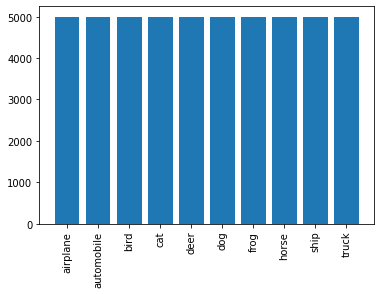

In [ ]:
plot_class_distribution(y_train)  #distribution of labels in train folder

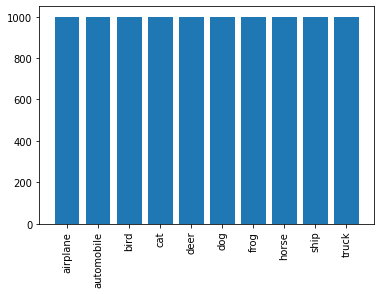

In [ ]:
plot_class_distribution(y_test)  #distribution of labels in test folder

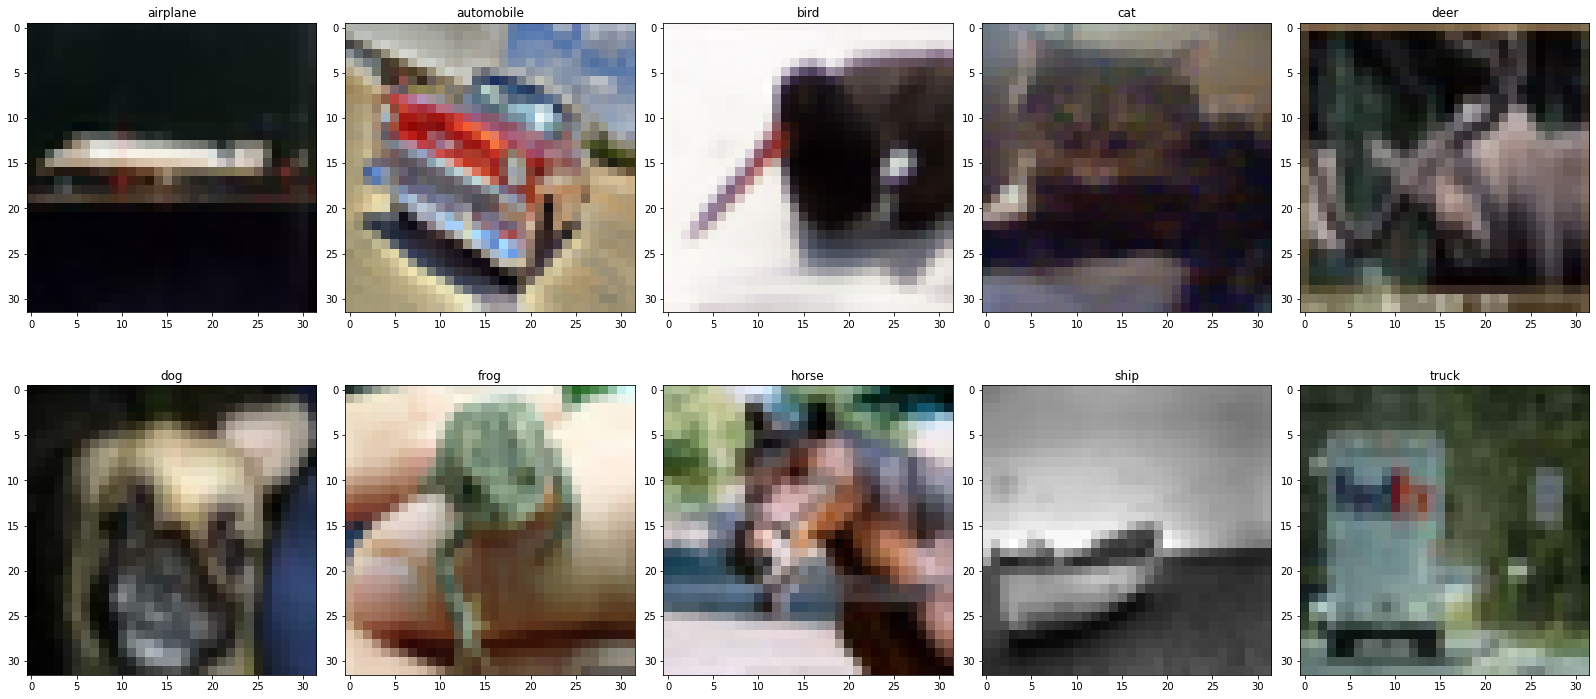

In [ ]:
plot_some_images(X_train,y_train)  #some images from training dataset

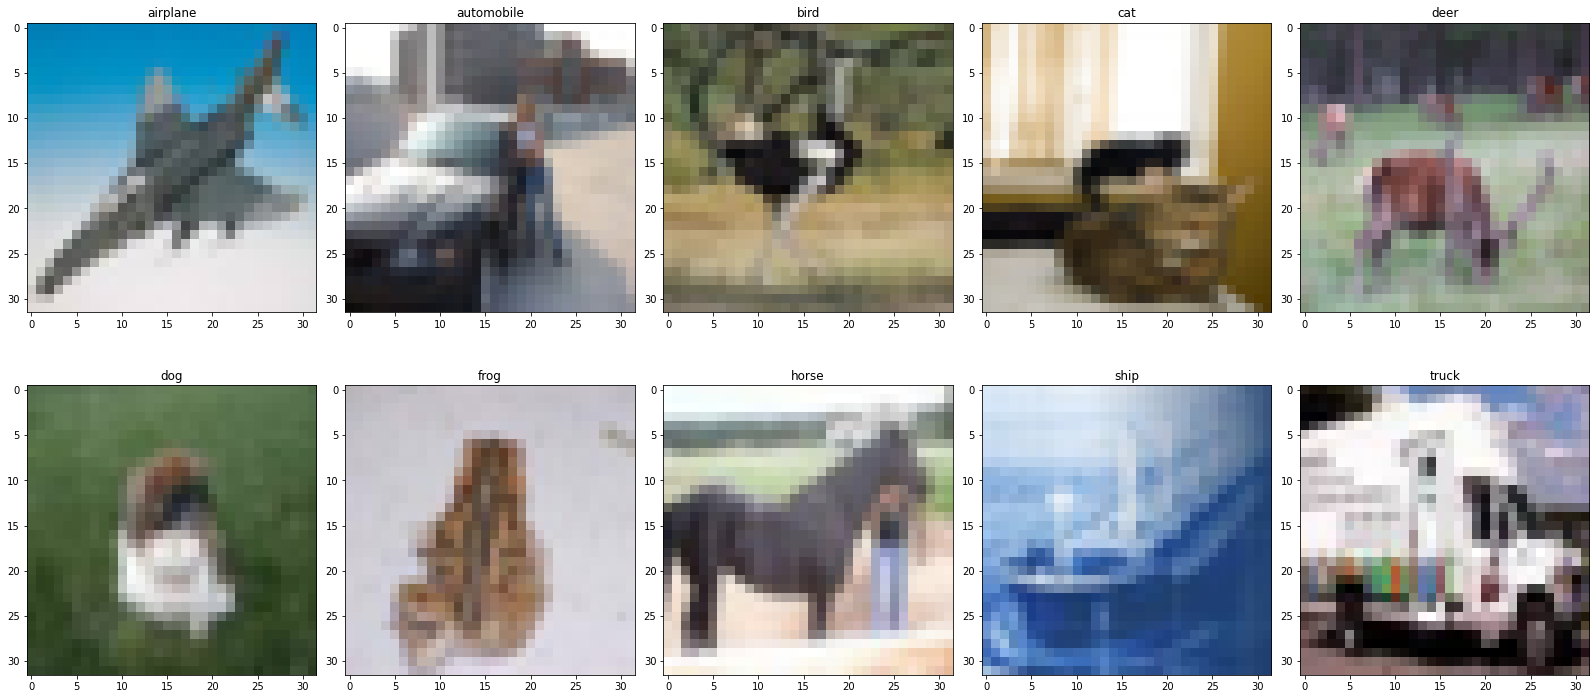

In [ ]:
plot_some_images(X_test,y_test)   #some images from test dataset

#Net A

In [ ]:
def create_model():
  encoder_input = layers.Input(shape=(32, 32, 3), name="original_img")
  x=tf.keras.layers.Reshape((3072,))(encoder_input)
  encoder_output=layers.Dense(10,activation='softmax',)(x)
  encoder = Model(encoder_input, encoder_output, name="encoder")
  encoder.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(),metrics=['acc'])
  return encoder

In [ ]:
modela=create_model()
modela.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 original_img (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 reshape_3 (Reshape)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mc = ModelCheckpoint('best_modela.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True, patience=15)
historya = modela.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    batch_size=64,
    epochs=50,
    callbacks=[mc],
    verbose=1
)

Epoch 1/50
778/782 [============================>.] - ETA: 0s - loss: 85.8195 - acc: 0.2292
Epoch 00001: val_loss improved from inf to 99.92913, saving model to best_modela.h5
782/782 [==============================] - 4s 4ms/step - loss: 85.8268 - acc: 0.2291 - val_loss: 99.9291 - val_acc: 0.2270
Epoch 2/50
767/782 [============================>.] - ETA: 0s - loss: 73.4457 - acc: 0.2580
Epoch 00002: val_loss improved from 99.92913 to 71.89874, saving model to best_modela.h5
782/782 [==============================] - 3s 4ms/step - loss: 73.4689 - acc: 0.2577 - val_loss: 71.8987 - val_acc: 0.2463
Epoch 3/50
773/782 [============================>.] - ETA: 0s - loss: 65.4438 - acc: 0.2673
Epoch 00003: val_loss improved from 71.89874 to 69.15362, saving model to best_modela.h5
782/782 [==============================] - 3s 4ms/step - loss: 65.6016 - acc: 0.2671 - val_loss: 69.1536 - val_acc: 0.2468
Epoch 4/50
767/782 [============================>.] - ETA: 0s - loss: 67.0091 - acc: 0.2699
E

#Net B

In [ ]:
def create_model():
  encoder_input = layers.Input(shape=(32, 32, 3), name="original_img")
  x=tf.keras.layers.Reshape((3072,))(encoder_input)
  x=layers.Dense(300,activation='relu')(x)
  encoder_output=layers.Dense(10,activation='softmax',)(x)
  encoder = Model(encoder_input, encoder_output, name="encoder")
  encoder.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(),metrics=['acc'])
  return encoder

In [ ]:
modelb=create_model()
modelb.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 original_img (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 reshape_4 (Reshape)         (None, 3072)              0         
                                                                 
 dense_5 (Dense)             (None, 300)               921900    
                                                                 
 dense_6 (Dense)             (None, 10)                3010      
                                                                 
Total params: 924,910
Trainable params: 924,910
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mc = ModelCheckpoint('best_modelb.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True, patience=15)
historyb = modelb.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    batch_size=64,
    epochs=50,
    callbacks=[mc],
    verbose=1
)

Epoch 1/50
775/782 [============================>.] - ETA: 0s - loss: 32.0043 - acc: 0.1098
Epoch 00001: val_loss improved from inf to 2.30518, saving model to best_modelb.h5
782/782 [==============================] - 4s 5ms/step - loss: 31.7667 - acc: 0.1096 - val_loss: 2.3052 - val_acc: 0.1001
Epoch 2/50
775/782 [============================>.] - ETA: 0s - loss: 2.3038 - acc: 0.0995
Epoch 00002: val_loss improved from 2.30518 to 2.30367, saving model to best_modelb.h5
782/782 [==============================] - 4s 5ms/step - loss: 2.3038 - acc: 0.0994 - val_loss: 2.3037 - val_acc: 0.1000
Epoch 3/50
779/782 [============================>.] - ETA: 0s - loss: 2.3025 - acc: 0.0990
Epoch 00003: val_loss did not improve from 2.30367
782/782 [==============================] - 4s 5ms/step - loss: 2.3025 - acc: 0.0990 - val_loss: 2.3042 - val_acc: 0.1001
Epoch 4/50
769/782 [============================>.] - ETA: 0s - loss: 2.3026 - acc: 0.0995
Epoch 00004: val_loss did not improve from 2.30367

#Net C

In [ ]:
def create_model():
  encoder_input = layers.Input(shape=(32, 32, 3), name="original_img")
  x=layers.Conv2D(25, (5,5), strides=(1,1),padding='valid')(encoder_input)
  x=layers.ReLU()(x)
  x=layers.MaxPooling2D(2,2)(x)
  x=layers.Flatten()(x)
  encoder_output=layers.Dense(10,activation='softmax',)(x)
  encoder = Model(encoder_input, encoder_output, name="encoder")
  encoder.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(),metrics=['acc'])
  return encoder

In [ ]:
modelc=create_model()
modelc.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 original_img (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 25)        1900      
                                                                 
 re_lu (ReLU)                (None, 28, 28, 25)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 25)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4900)              0         
                                                                 
 dense_7 (Dense)             (None, 10)                49010     
                                                           

In [ ]:
mc = ModelCheckpoint('best_modelc.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True, patience=15)
historyc = modelc.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    batch_size=64,
    epochs=50,
    callbacks=[mc],
    verbose=1
)

Epoch 1/50
782/782 [==============================] - ETA: 0s - loss: 3.0842 - acc: 0.2064
Epoch 00001: val_loss improved from inf to 2.06380, saving model to best_modelc.h5
782/782 [==============================] - 32s 6ms/step - loss: 3.0842 - acc: 0.2064 - val_loss: 2.0638 - val_acc: 0.2850
Epoch 2/50
772/782 [============================>.] - ETA: 0s - loss: 2.0148 - acc: 0.2788
Epoch 00002: val_loss did not improve from 2.06380
782/782 [==============================] - 5s 6ms/step - loss: 2.0157 - acc: 0.2781 - val_loss: 2.0763 - val_acc: 0.2228
Epoch 3/50
773/782 [============================>.] - ETA: 0s - loss: 1.9190 - acc: 0.3155
Epoch 00003: val_loss improved from 2.06380 to 1.91798, saving model to best_modelc.h5
782/782 [==============================] - 5s 6ms/step - loss: 1.9189 - acc: 0.3155 - val_loss: 1.9180 - val_acc: 0.3346
Epoch 4/50
776/782 [============================>.] - ETA: 0s - loss: 1.8766 - acc: 0.3252
Epoch 00004: val_loss did not improve from 1.91798


#plotting Histories

In [ ]:
def plot_history(history):
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

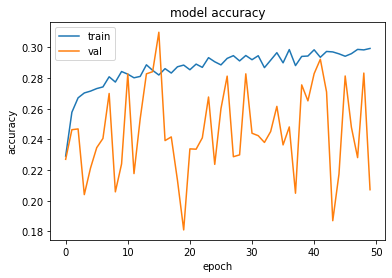

In [ ]:
plot_history(historya) #for Net A

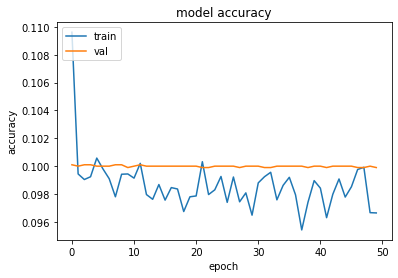

In [ ]:
plot_history(historyb) # for Net B

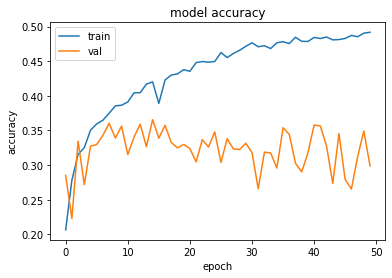

In [ ]:
plot_history(historyc)  #for Net C

In [ ]:
modela=load_model('/content/best_modela.h5')
modelb=load_model('/content/best_modelb.h5')
modelc=load_model('/content/best_modelc.h5')

In [ ]:
modela.evaluate(X_test,y_test) #net A

313/313 [==============================] - 1s 3ms/step - loss: 47.0963 - acc: 0.2827


[47.09627151489258, 0.2827000021934509]

In [ ]:
modelb.evaluate(X_test,y_test) # net B

313/313 [==============================] - 1s 3ms/step - loss: 2.3037 - acc: 0.1000


[2.3036720752716064, 0.10000000149011612]

In [ ]:
modelc.evaluate(X_test,y_test) #net C

313/313 [==============================] - 1s 4ms/step - loss: 1.9180 - acc: 0.3346


[1.9179819822311401, 0.3346000015735626]

#                                  Thank you                             